**Credit Card Clustering**

**Introduction**

Credit card clustering aims to group credit card holders based on their spending habits, credit limits, and other financial behaviors. This segmentation helps businesses understand customer behavior, target marketing campaigns, and improve financial strategies. In this project, we will perform credit card clustering using Python and machine learning techniques.

**Requirements**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Data Import**

In [ ]:
df = pd.read_csv("CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Exploratory Data Analysis - EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
df.shape

(8950, 18)

**Data Visualization**

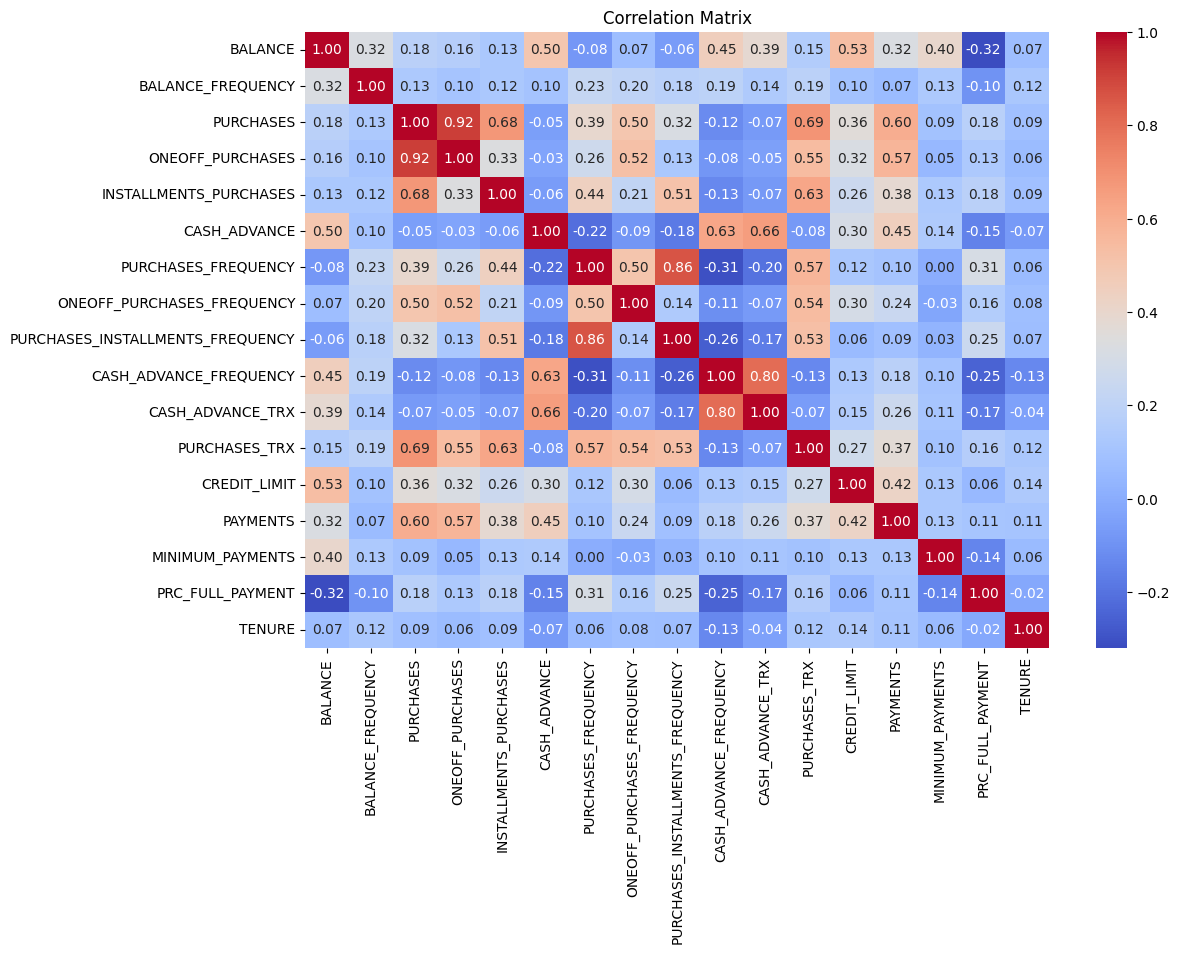

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

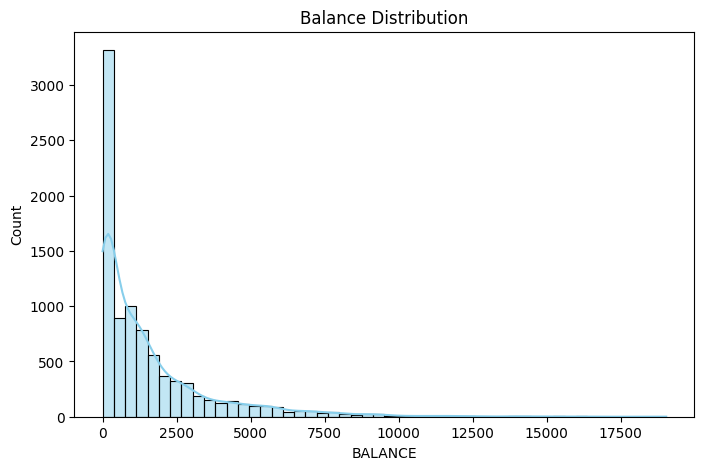

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['BALANCE'], bins=50, kde=True, color='skyblue')
plt.title("Balance Distribution")
plt.show()

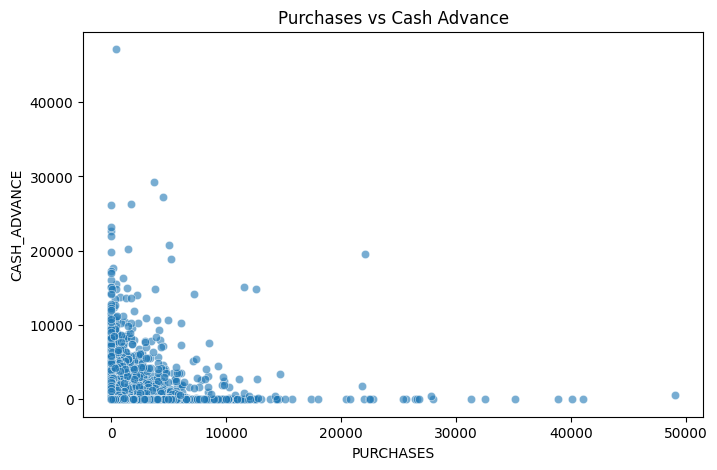

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='PURCHASES', y='CASH_ADVANCE', alpha=0.6)
plt.title("Purchases vs Cash Advance")
plt.show()

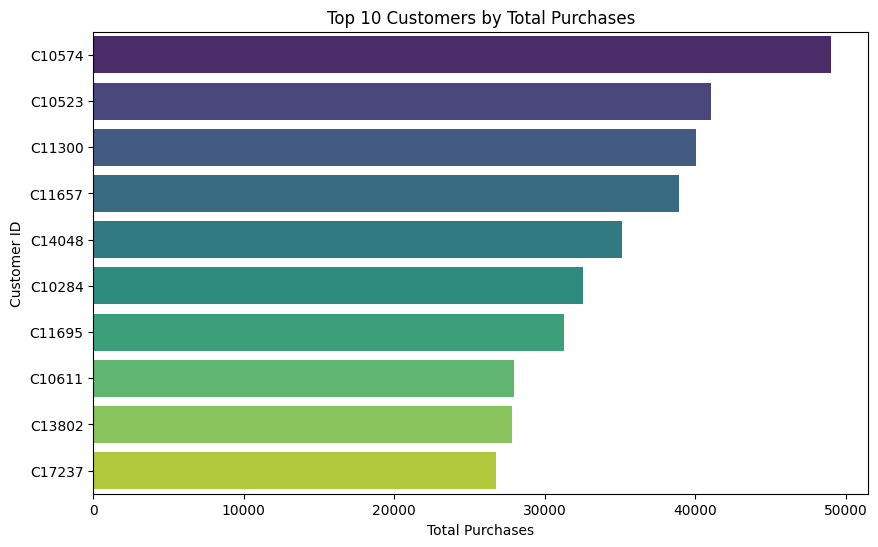

In [ ]:
plt.figure(figsize=(10,6))
top_customers = df.groupby('CUST_ID')['PURCHASES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title("Top 10 Customers by Total Purchases")
plt.xlabel("Total Purchases")
plt.ylabel("Customer ID")
plt.show()

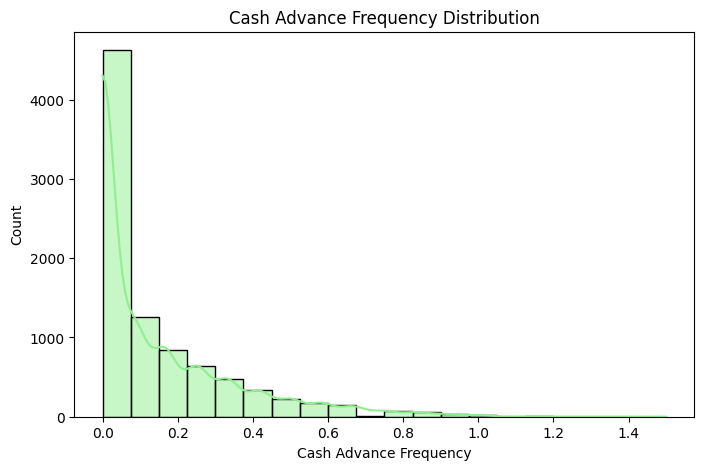

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['CASH_ADVANCE_FREQUENCY'], bins=20, kde=True, color='lightgreen')
plt.title("Cash Advance Frequency Distribution")
plt.xlabel("Cash Advance Frequency")
plt.ylabel("Count")
plt.show()


**Data Cleaning**

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Modeling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

num_cols = df.select_dtypes(include=['float64','int64']).columns

X_scaled = StandardScaler().fit_transform(df[num_cols])

best_score = -1
best_k = 0
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k

best_model = KMeans(n_clusters=best_k, random_state=42)
labels = best_model.fit_predict(X_scaled)

best_score, best_k


(np.float64(0.2795391709471095), 2)

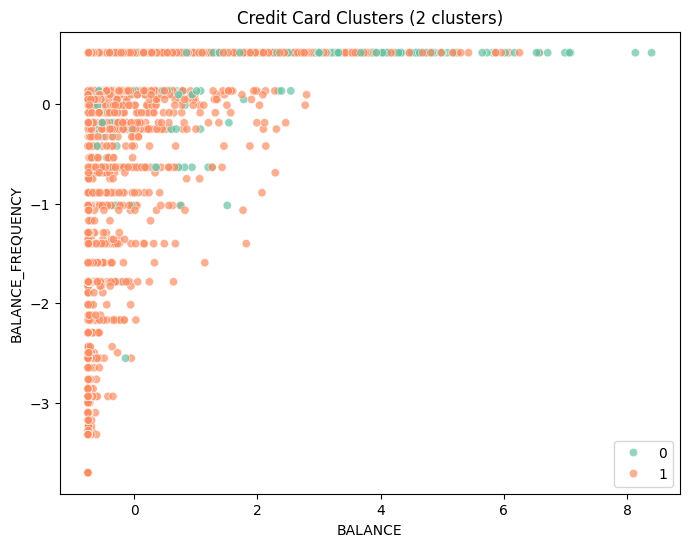

In [ ]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

num_cols = df.select_dtypes(include=['float64','int64']).columns
X_scaled = StandardScaler().fit_transform(df[num_cols])

best_model = KMeans(n_clusters=2, random_state=42)
labels = best_model.fit_predict(X_scaled)

pickle.dump(best_model, open("best_creditcard_cluster.pkl", "wb"))

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette="Set2", alpha=0.7)
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title("Credit Card Clusters (2 clusters)")
plt.show()


**Conclusion**

The credit card clustering analysis revealed that the optimal number of clusters is 2, with a silhouette score of approximately 0.28, indicating moderately well-separated clusters. These clusters can help in segmenting customers based on their spending habits, balance, and credit usage. Although the clusters are not perfectly distinct, they provide a practical starting point for targeted marketing strategies or further analysis with more features or alternative clustering algorithms.